## 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

## 2: Create a sample dataset

In [ ]:
# Create sample dataset with 10 points in 2D space
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=42)

# Display the dataset
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
print(df)


   Feature_1  Feature_2
0  -5.413978  -7.105886
1  -7.424010  -6.769187
2   3.627048   2.287417
3  -6.812099  -8.304858
4  -2.267235   7.101006
5  -2.978672   9.556846
6  -0.929985   9.781721
7   2.914961   1.410882
8   3.731855   0.560866
9  -2.972615   8.548556


## 3: Visualize the raw data points

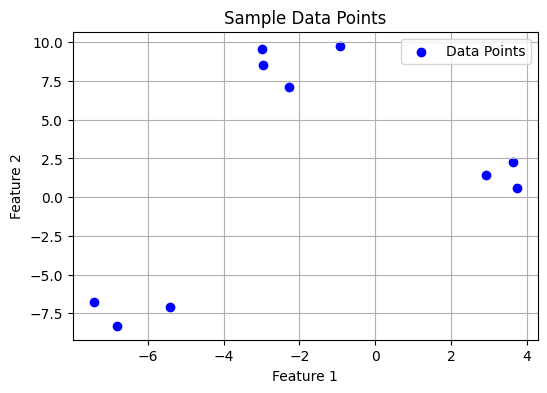

In [ ]:
# Scatter plot of the data
plt.figure(figsize=(6, 4))
plt.scatter(df['Feature_1'], df['Feature_2'], c='blue', label='Data Points')
plt.title("Sample Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


## 4: Perform hierarchical clustering with different linkage methods

In [ ]:
def plot_dendrogram(linkage_method):
    Z = linkage(df, method=linkage_method, metric='euclidean')

    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=np.arange(1, len(df)+1))
    plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method.capitalize()} Linkage)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()


## 5: Generate dendrograms for each linkage method

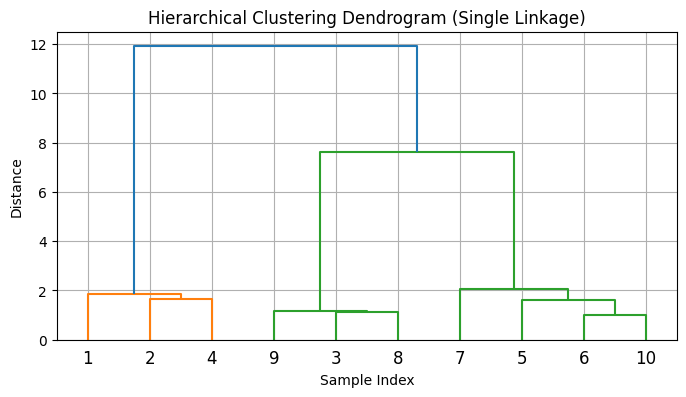

In [ ]:
# Single Linkage
plot_dendrogram('single')


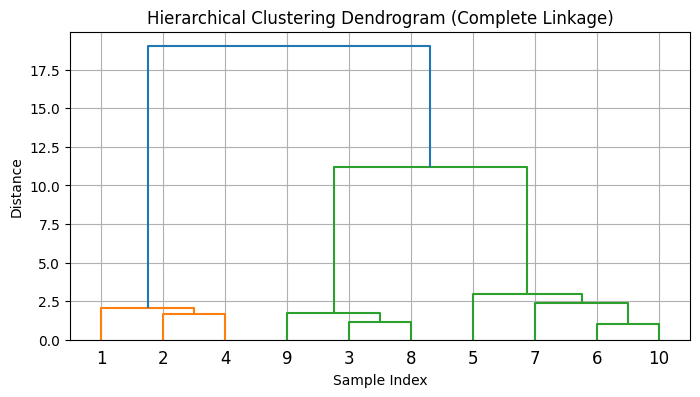

In [ ]:
# Complete Linkage
plot_dendrogram('complete')


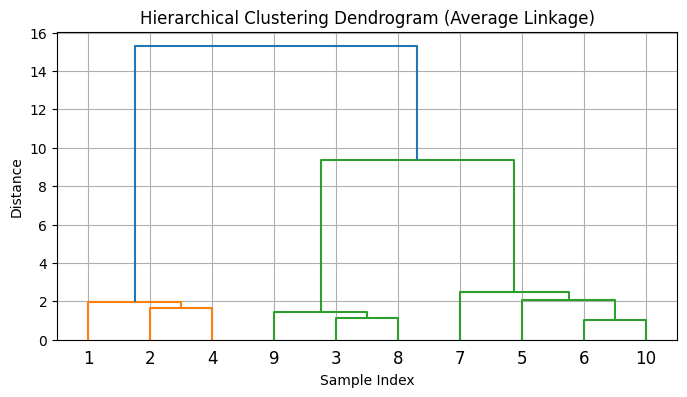

In [ ]:
# Average Linkage (Group average)
plot_dendrogram('average')


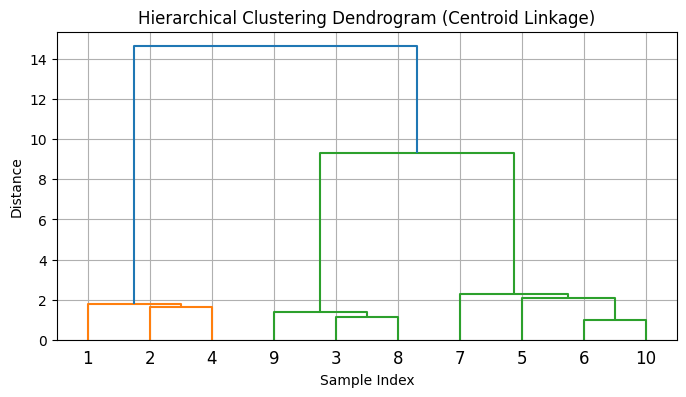

In [ ]:
# Centroid Linkage
plot_dendrogram('centroid')


## 6.Define a modified dendrogram function using Manhattan distance

In [ ]:
def plot_dendrogram_manhattan(linkage_method):
    Z = linkage(df, method=linkage_method, metric='cityblock')  # 'cityblock' = Manhattan distance

    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=np.arange(1, len(df)+1))
    plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method.capitalize()} Linkage, Manhattan Distance)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()


## 7.Plot dendrograms using Manhattan Distance

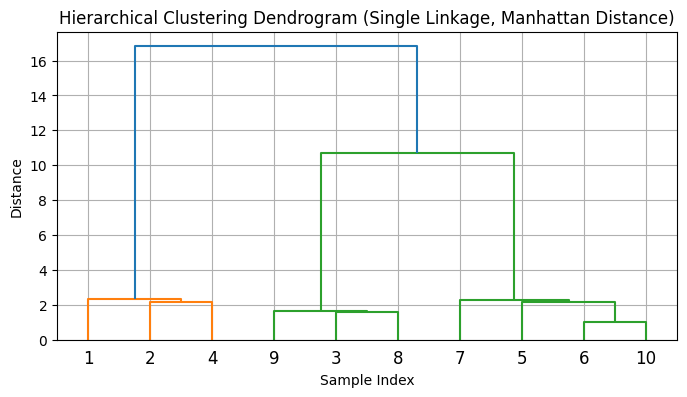

In [ ]:
# Single Linkage - Manhattan
plot_dendrogram_manhattan('single')


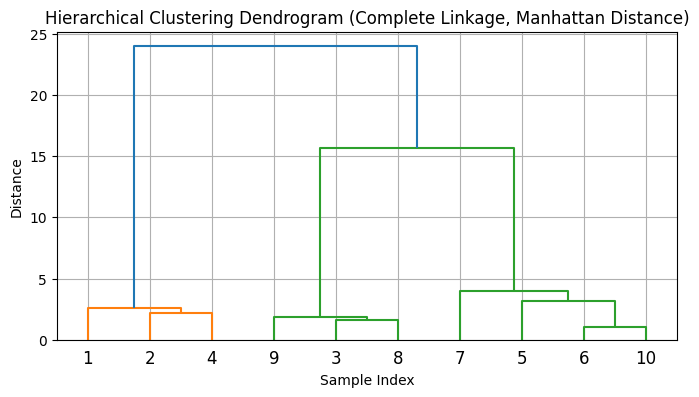

In [ ]:
# Complete Linkage - Manhattan
plot_dendrogram_manhattan('complete')


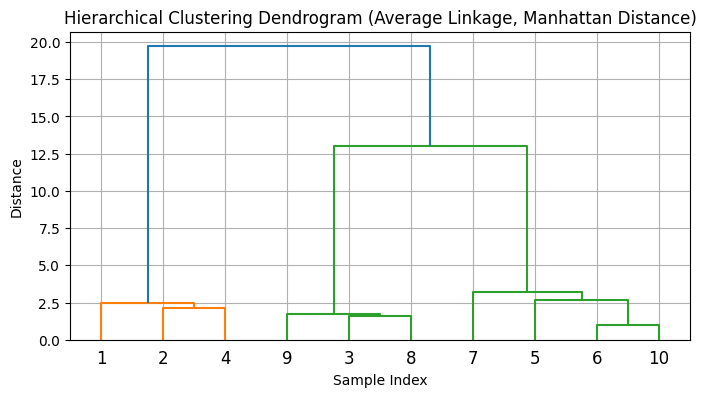

In [ ]:
# Average Linkage - Manhattan
plot_dendrogram_manhattan('average')


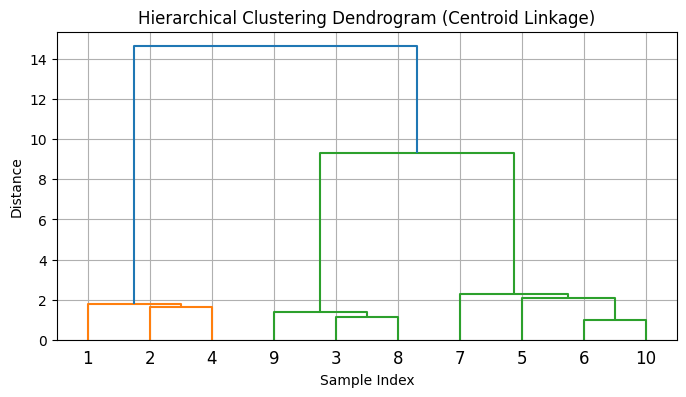

In [ ]:
# Only use centroid linkage with Euclidean distance
plot_dendrogram('centroid')  # Works fine


## 8.Compare Results Side-by-Side (Euclidean vs Manhattan)

In [ ]:
def compare_dendrograms(method):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Euclidean always works
    Z_euclidean = linkage(df, method=method, metric='euclidean')
    dendrogram(Z_euclidean, labels=np.arange(1, len(df)+1), ax=axes[0])
    axes[0].set_title(f"{method.capitalize()} Linkage (Euclidean)")
    axes[0].set_xlabel("Sample Index")
    axes[0].set_ylabel("Distance")
    axes[0].grid(True)

    if method != 'centroid':
        # Only use Manhattan when the method allows it
        Z_manhattan = linkage(df, method=method, metric='cityblock')
        dendrogram(Z_manhattan, labels=np.arange(1, len(df)+1), ax=axes[1])
        axes[1].set_title(f"{method.capitalize()} Linkage (Manhattan)")
        axes[1].set_xlabel("Sample Index")
        axes[1].set_ylabel("Distance")
        axes[1].grid(True)
    else:
        # Display a message for unsupported Manhattan + Centroid
        axes[1].axis('off')
        axes[1].text(0.5, 0.5, 'Not supported for Manhattan\n(centroid only works with Euclidean)',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.7))

    plt.tight_layout()
    plt.show()



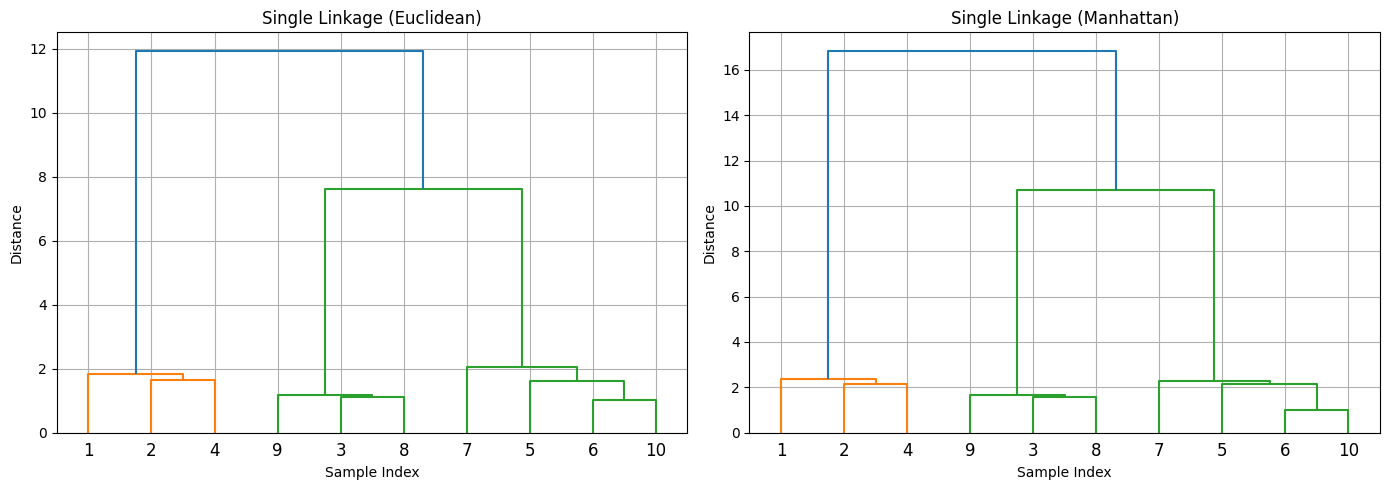

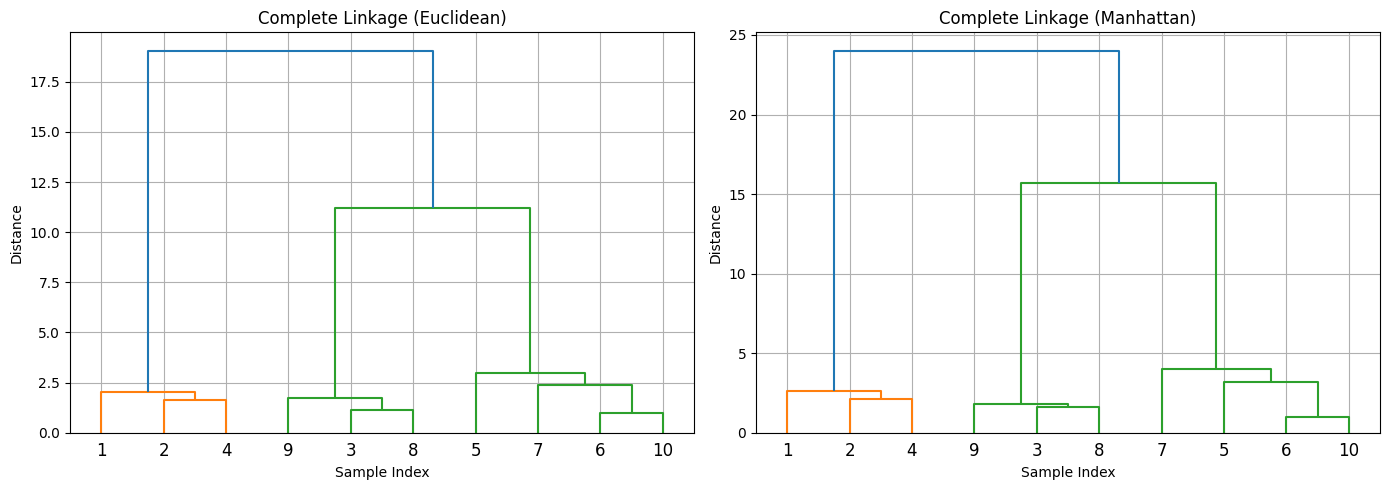

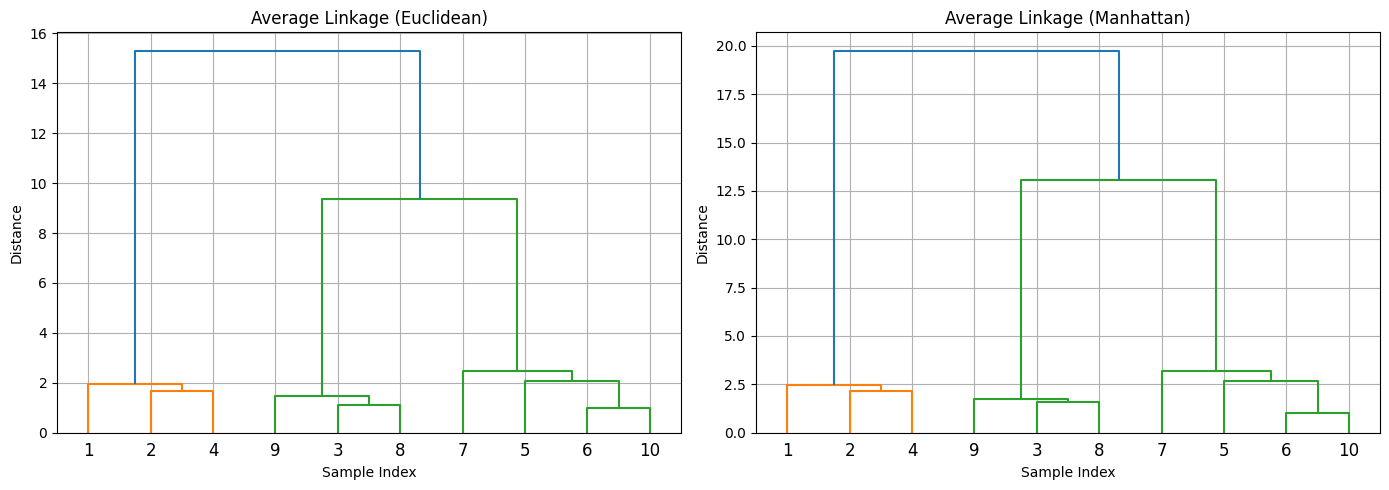

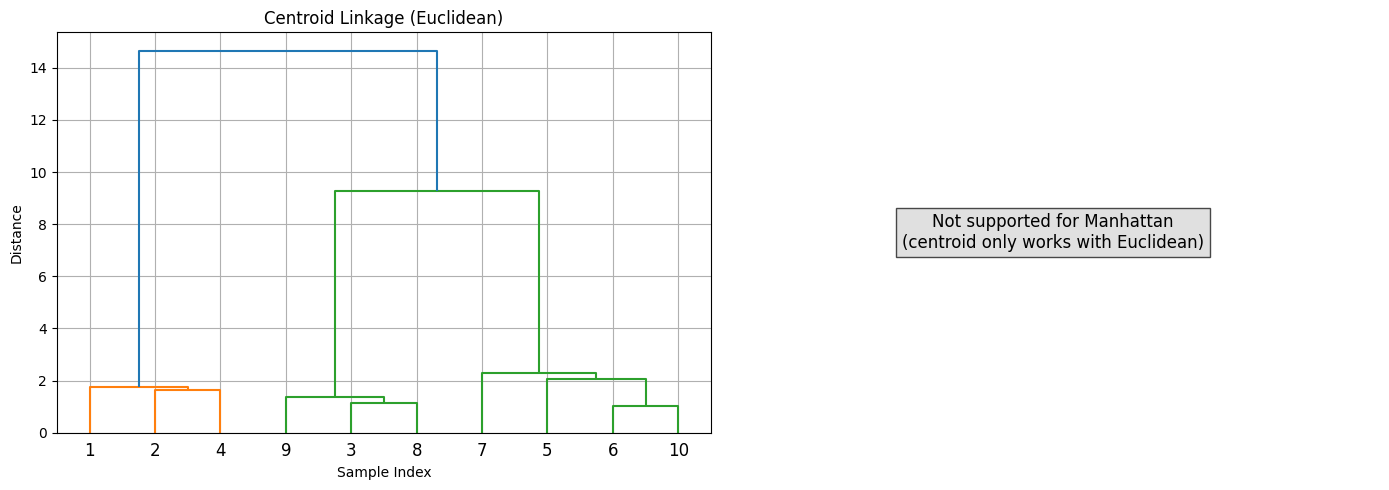

In [ ]:
compare_dendrograms('single')
compare_dendrograms('complete')
compare_dendrograms('average')
compare_dendrograms('centroid')


## 9. Import fcluster

In [ ]:
from scipy.cluster.hierarchy import fcluster


## 10.Perform clustering and cut dendrogram

In [ ]:
# Perform hierarchical clustering
Z = linkage(df, method='complete', metric='euclidean')

# Cut the dendrogram to form 3 clusters
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Print the cluster labels
print("Cluster labels:", clusters)


Cluster labels: [1 1 2 1 3 3 3 2 2 3]


## 11.Visualize the clustered data

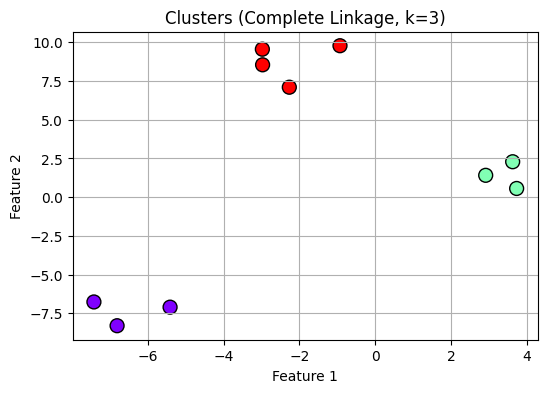

In [ ]:
# Scatter plot with clusters
plt.figure(figsize=(6, 4))
plt.scatter(df['Feature_1'], df['Feature_2'], c=clusters, cmap='rainbow', s=100, edgecolors='k')
plt.title(f"Clusters (Complete Linkage, k={num_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
